Mean absolute error: 15066.628515810482
Mean squared error: 713017287.5648723


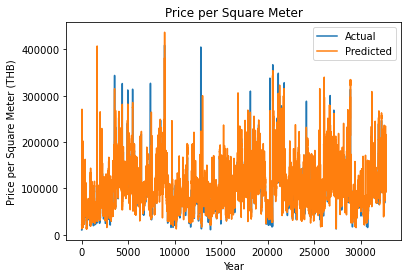

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('df_cleaned.csv')

# Drop the "name" column
df = df.drop('name', axis=1)

# Encode the district column
encoder = LabelEncoder()
df['district'] = encoder.fit_transform(df['district'])

# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the datetime object
df['year'] = df['date'].dt.year

# Split the dataset into training and testing sets
X_train = df.drop('price_sqm', axis=1)
y_train = df['price_sqm']
X_test = df.drop('price_sqm', axis=1)
y_test = df['price_sqm']

# Remove the date column from the training and testing sets
X_train = X_train.drop('date', axis=1)
X_test = X_test.drop('date', axis=1)

# Create the model
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the price per square meter for the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean absolute error:', np.mean(np.abs(y_pred - y_test)))
print('Mean squared error:', np.mean((y_pred - y_test)**2))

# Visualize the results
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Price per Square Meter')
plt.xlabel('Year')
plt.ylabel('Price per Square Meter (THB)')
plt.legend()
plt.show()




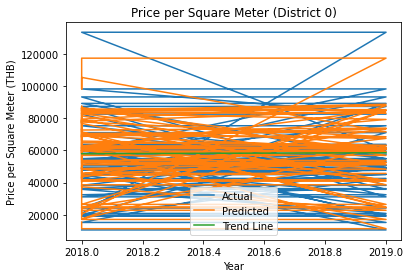

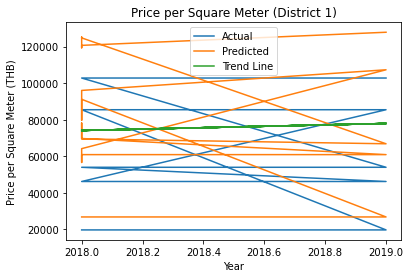

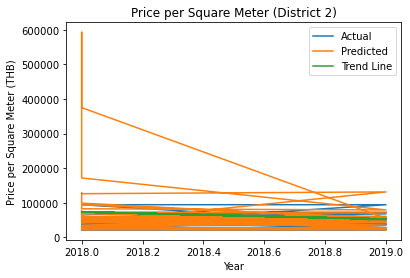

/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


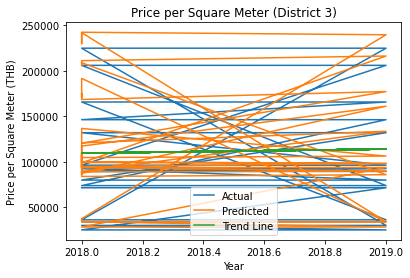

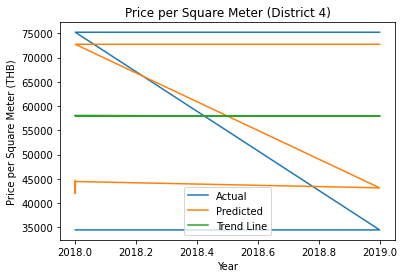

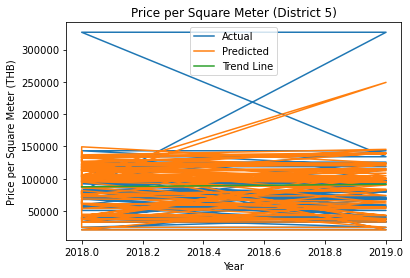

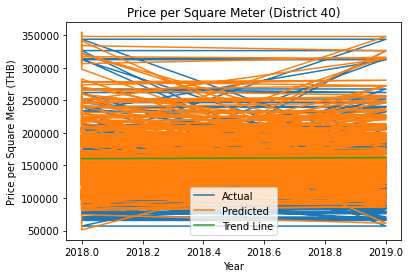

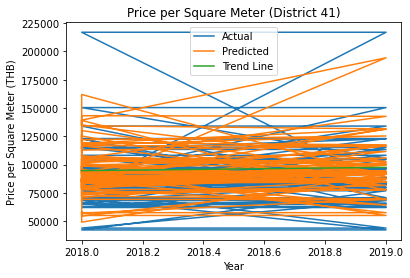

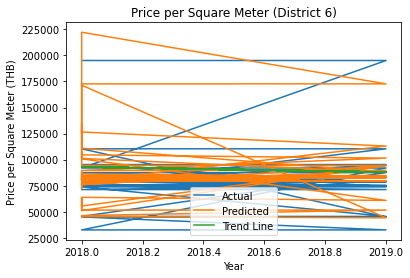

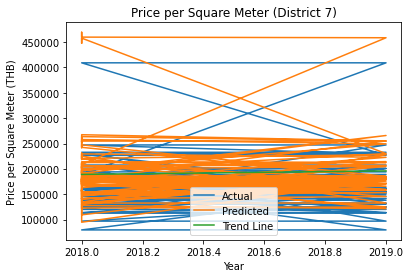

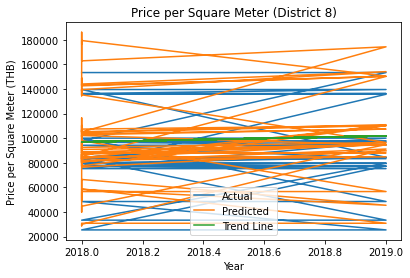

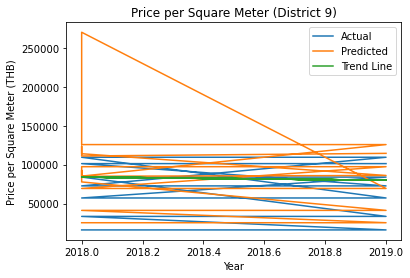

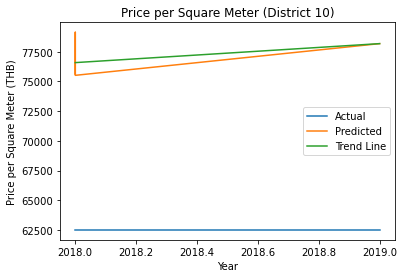

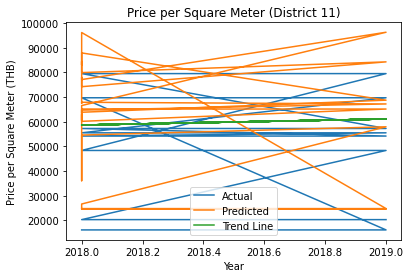

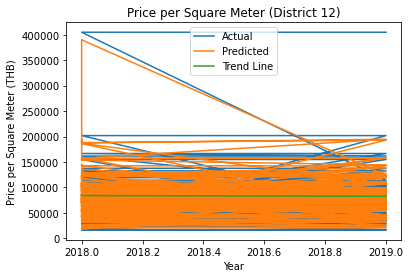

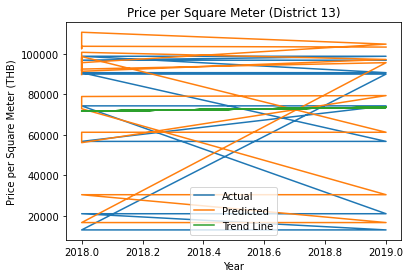

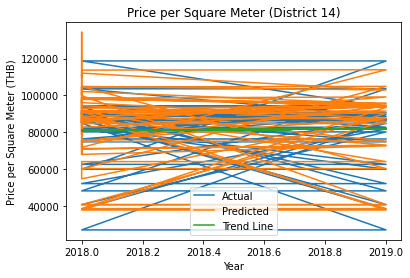

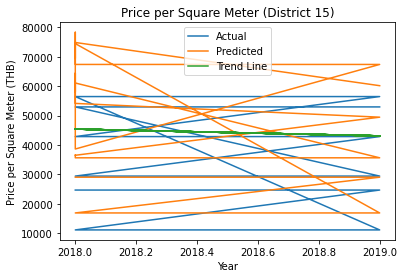

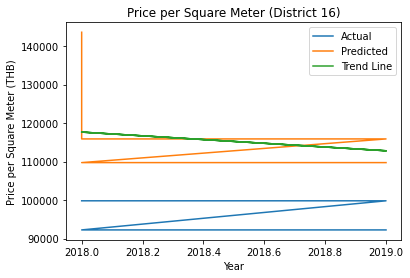

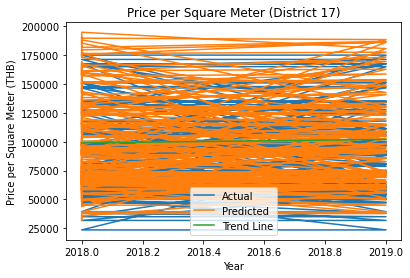

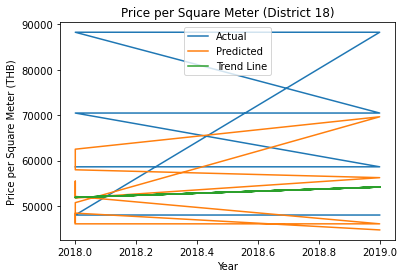

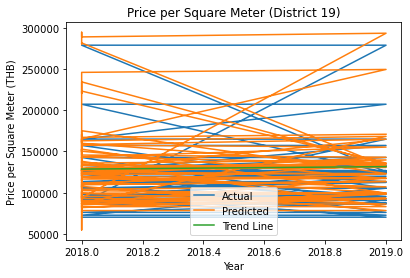

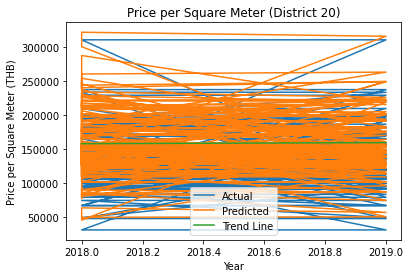

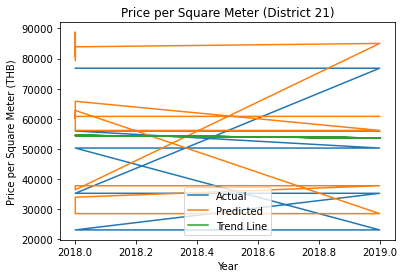

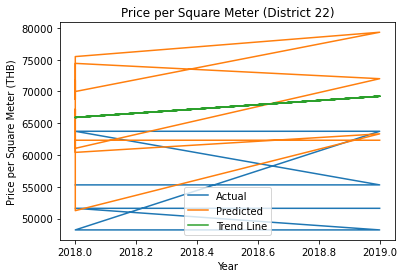

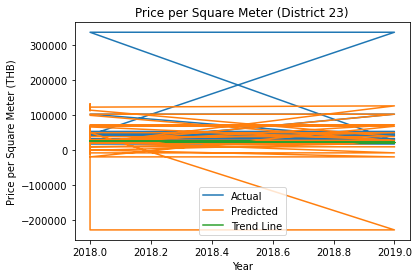

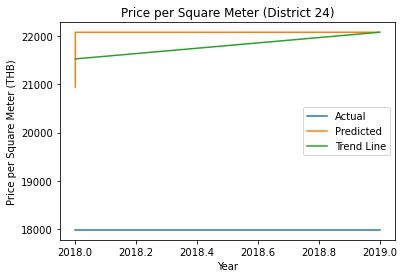

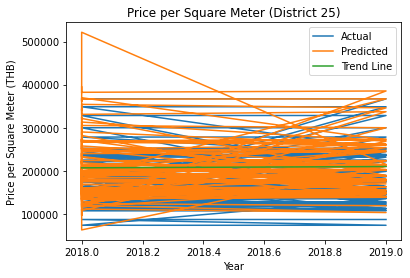

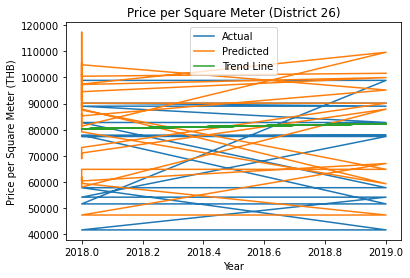

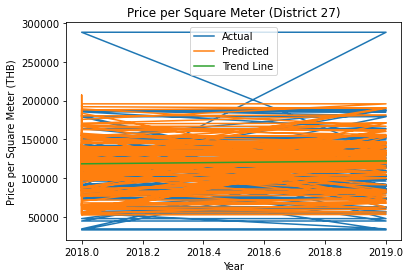

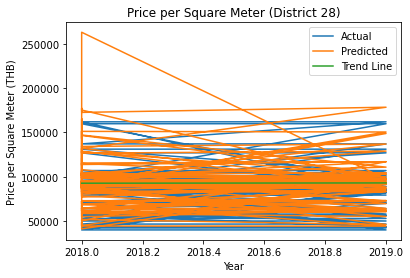

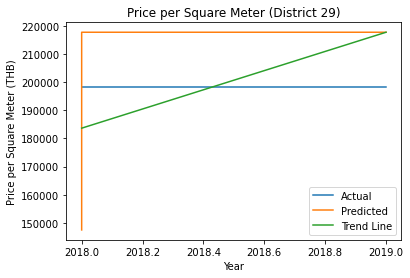

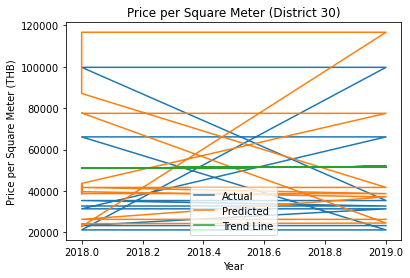

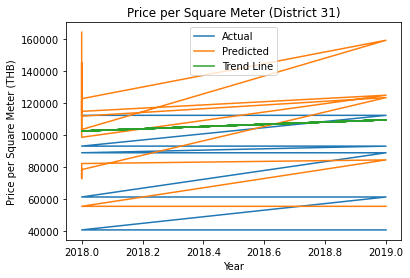

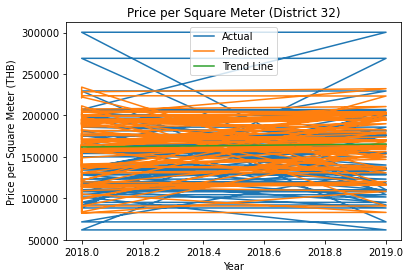

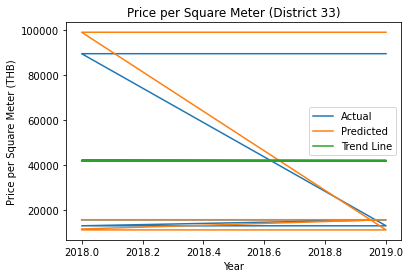

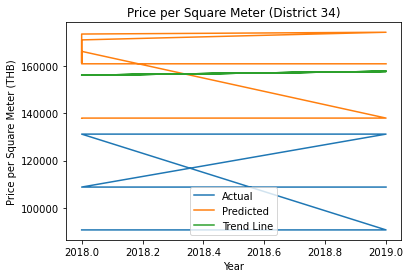

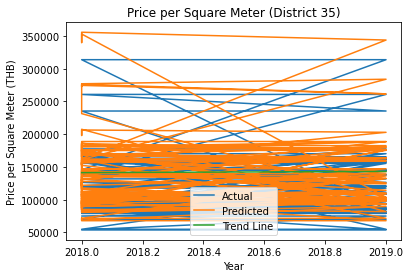

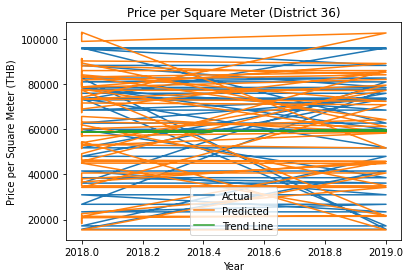

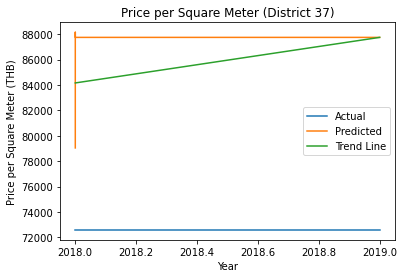

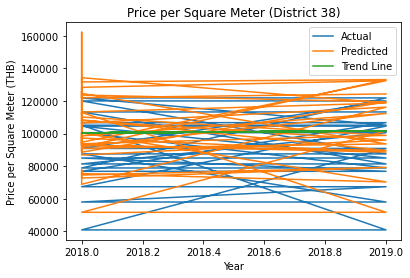

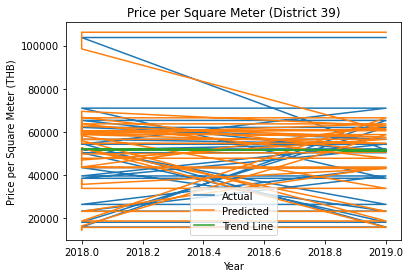

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('df_cleaned.csv')

# Drop the "name" column
df = df.drop('name', axis=1)

# Encode the district column
encoder = LabelEncoder()
df['district'] = encoder.fit_transform(df['district'])

# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the datetime object
df['year'] = df['date'].dt.year

# Split the dataset into training and testing sets
train_df = df[df['year'] <= 2017]
test_df = df[df['year'] >= 2018]

# Create a list of unique districts
districts = train_df['district'].unique()

# Iterate over each district
for district in districts:
    # Filter data for the current district
    district_train_df = train_df[train_df['district'] == district]
    district_test_df = test_df[test_df['district'] == district]

    # Split the data into features and target
    X_train = district_train_df.drop('price_sqm', axis=1)
    y_train = district_train_df['price_sqm']
    X_test = district_test_df.drop('price_sqm', axis=1)
    y_test = district_test_df['price_sqm']

    # Remove the date column from the features
    X_train = X_train.drop('date', axis=1)
    X_test = X_test.drop('date', axis=1)

    # Create the model
    model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict the price per square meter for the testing set
    y_pred = model.predict(X_test)

    # Create a new DataFrame for plotting
    plot_df = pd.DataFrame({'year': district_test_df['year'], 'actual': y_test, 'predicted': y_pred})

    # Plot the actual and predicted prices with a trend line
    plt.figure()
    plt.plot(plot_df['year'], plot_df['actual'], label='Actual')
    plt.plot(plot_df['year'], plot_df['predicted'], label='Predicted')

    # Add a trend line
    z = np.polyfit(plot_df['year'], plot_df['predicted'], 1)
    p = np.poly1d(z)
    plt.plot(plot_df['year'], p(plot_df['year']), label='Trend Line')

    plt.title('Price per Square Meter (District {})'.format(district))
    plt.xlabel('Year')
    plt.ylabel('Price per Square Meter (THB)')
    plt.legend()
    plt.show()



/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weig

/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklear

/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weig

/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning

/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weig

/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklear

/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weig

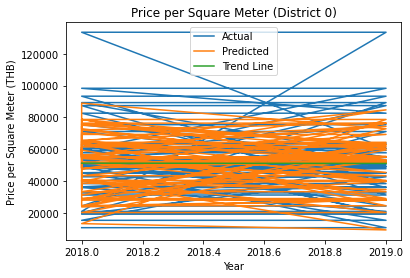

/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynndalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('df_cleaned.csv')

# Drop the "name" column
df = df.drop('name', axis=1)

# Encode the district column
encoder = LabelEncoder()
df['district'] = encoder.fit_transform(df['district'])

# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the datetime object
df['year'] = df['date'].dt.year

# Split the dataset into training and testing sets
train_df = df[df['year'] <= 2017]
test_df = df[df['year'] >= 2018]

# Create a list of unique districts
districts = train_df['district'].unique()

# Define parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Iterate over each district
for district in districts:
    # Filter data for the current district
    district_train_df = train_df[train_df['district'] == district]
    district_test_df = test_df[test_df['district'] == district]

    # Split the data into features and target
    X_train = district_train_df.drop('price_sqm', axis=1)
    y_train = district_train_df['price_sqm']
    X_test = district_test_df.drop('price_sqm', axis=1)
    y_test = district_test_df['price_sqm']

    # Remove the date column from the features
    X_train = X_train.drop('date', axis=1)
    X_test = X_test.drop('date', axis=1)

    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create the model
    model = MLPRegressor(max_iter=1000)

    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, cv=3)
    grid_search.fit(X_train, y_train)

    # Use the best estimator
    model = grid_search.best_estimator_

    # Predict the price per square meter for the testing set
    y_pred = model.predict(X_test)

    # Create a new DataFrame for plotting
    plot_df = pd.DataFrame({'year': district_test_df['year'], 'actual': y_test, 'predicted': y_pred})

    # Plot the actual and predicted prices with a trend line
    plt.figure()
    plt.plot(plot_df['year'], plot_df['actual'], label='Actual')
    plt.plot(plot_df['year'], plot_df['predicted'], label='Predicted')

    # Add a trend line
    z = np.polyfit(plot_df['year'], plot_df['predicted'], 1)
    p = np.poly1d(z)
    plt.plot(plot_df['year'], p(plot_df['year']), label='Trend Line')

    plt.title('Price per Square Meter (District {})'.format(district))
    plt.xlabel('Year')
    plt.ylabel('Price per Square Meter (THB)')
    plt.legend()
    plt.show()
